In [173]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/diabetescsv/diabetes.csv


In [174]:
df= pd.read_csv('/kaggle/input/diabetescsv/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [175]:
print(f"dimension of data {df.shape}")

dimension of data (768, 9)


In [176]:
# outcome is the feature that we are going to predict
print(df.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


<AxesSubplot:ylabel='count'>

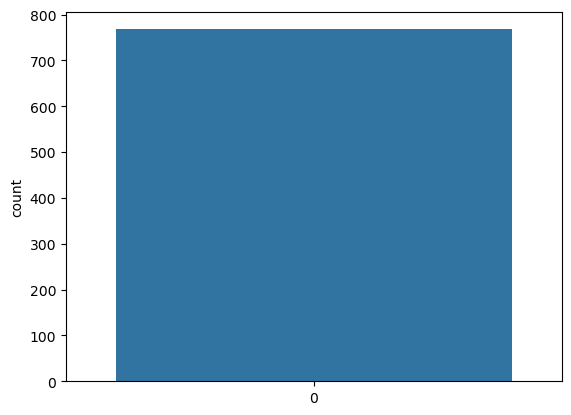

In [177]:
import seaborn as sns

sns.countplot(df['Outcome'],label='Count')

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [179]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 1:k-Nearest Neighbors

In [180]:
from sklearn.model_selection import train_test_split

# stratify : which ensures that the train and test sets have the same proportion of classes as the original dataset. This is useful when the target variable is imbalanced.
X_train,X_test,y_train,y_test=train_test_split(df.loc[:,df.columns !='Outcome'],
                                              df.Outcome,stratify=df.Outcome,
                                              random_state=66)


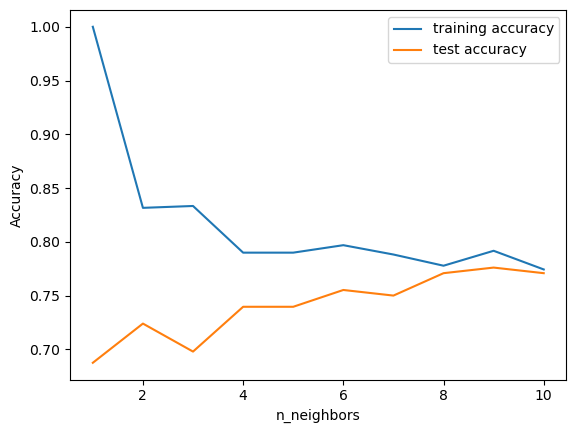

In [181]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
test_accuracy=[]

# try n_neighbors from 1 to 10

neighbors_settings=range(1,11)
for n_neighbors in neighbors_settings:
    # build the model
    knn =KNeighborsClassifier(n_neighbors=n_neighbors,metric='euclidean')
    knn.fit(X_train,y_train)
    
    # record training set accuracy
    training_accuracy.append(knn.score(X_train,y_train))
    
    # record test set accuracy 
    test_accuracy.append(knn.score(X_test,y_test))
    
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model', format='png')

In [182]:
max_index = test_accuracy.index(max(test_accuracy))+1
knn=KNeighborsClassifier(n_neighbors=max_index)
knn.fit(X_train,y_train)
print(f'Accuracy training set {knn.score(X_train,y_train)}')
print(f'Accuracy test set {knn.score(X_test,y_test)}')

Accuracy training set 0.7916666666666666
Accuracy test set 0.7760416666666666


# Logistic Regression

In [183]:
from sklearn.linear_model import LogisticRegression

logreg1=LogisticRegression(C=1)
logreg1.fit(X_train,y_train)

print(f'{logreg1.score(X_train,y_train)}')
print(f'{logreg1.score(X_test,y_test)}')


0.7847222222222222
0.7708333333333334


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [184]:
logreg001=LogisticRegression(C=.01)
logreg001.fit(X_train,y_train)

print(f'{logreg001.score(X_train,y_train)}')
print(f'{logreg001.score(X_test,y_test)}')

0.7621527777777778
0.7604166666666666


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [185]:
logreg100=LogisticRegression(C=100)
logreg100.fit(X_train,y_train)

print(f'{logreg100.score(X_train,y_train)}')
print(f'{logreg100.score(X_test,y_test)}')

0.7829861111111112
0.78125


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [186]:
diabetes_features=[x for i,x in enumerate(df.columns)]
diabetes_features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

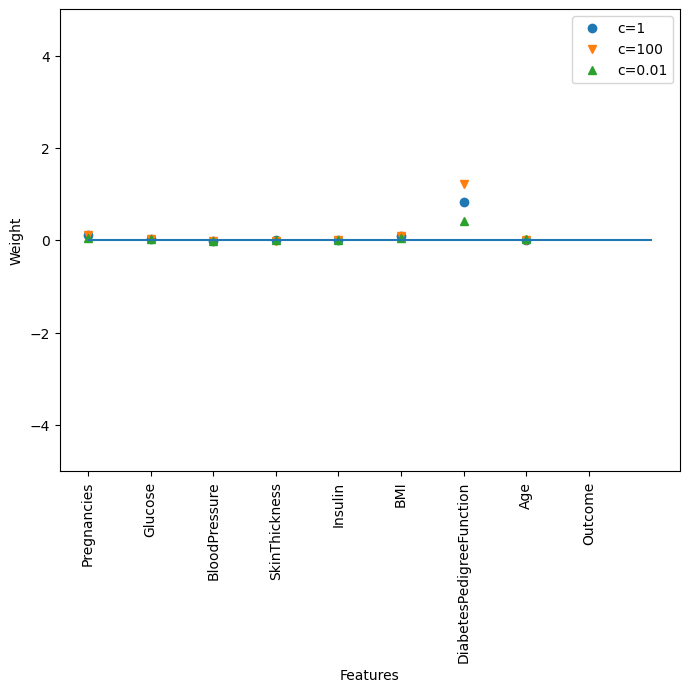

In [187]:
plt.figure(figsize=(8,6))
plt.plot(logreg1.coef_.T,'o',label='c=1')
plt.plot(logreg100.coef_.T,'v',label='c=100')
plt.plot(logreg001.coef_.T,'^',label='c=0.01')

plt.xticks(range(df.shape[1]),diabetes_features,rotation=90)
plt.hlines(0,0,df.shape[1])
plt.ylim(-5,5)
plt.ylabel("Weight")
plt.xlabel("Features")
plt.legend()


# Decesion tree

In [188]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print(f'Accuracy in training set {tree.score(X_train,y_train)}')
print(f'Accuracy in testing set {tree.score(X_test,y_test)}')
# Overfitting occurs

Accuracy in training set 1.0
Accuracy in testing set 0.7135416666666666


In [189]:
tree=DecisionTreeClassifier(max_depth=3,random_state=0)
tree.fit(X_train,y_train)
print(f'Accuracy in training set {tree.score(X_train,y_train)}')
print(f'Accuracy in testing set {tree.score(X_test,y_test)}')

Accuracy in training set 0.7725694444444444
Accuracy in testing set 0.7395833333333334


# Feature Importance

In [190]:
print(f"Feature importance {tree.feature_importances_}")

Feature importance [0.04554275 0.6830362  0.         0.         0.         0.27142106
 0.         0.        ]


['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


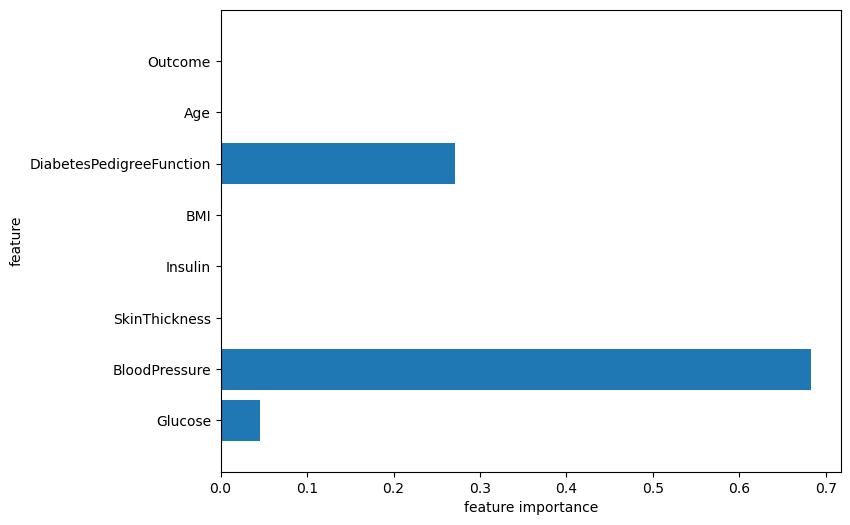

In [191]:
print(diabetes_features)
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features=8
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),diabetes_features[1:])
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1,n_features)
plot_feature_importances_diabetes(tree)
plt.savefig("feature importances in decesion tree",format='png')

In [192]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(X_train,y_train)
print(f"Accuracy on training set {rf.score(X_train,y_train)}")
print(f"Accuracy on testing set {rf.score(X_test,y_test)}")

Accuracy on training set 1.0
Accuracy on testing set 0.7864583333333334


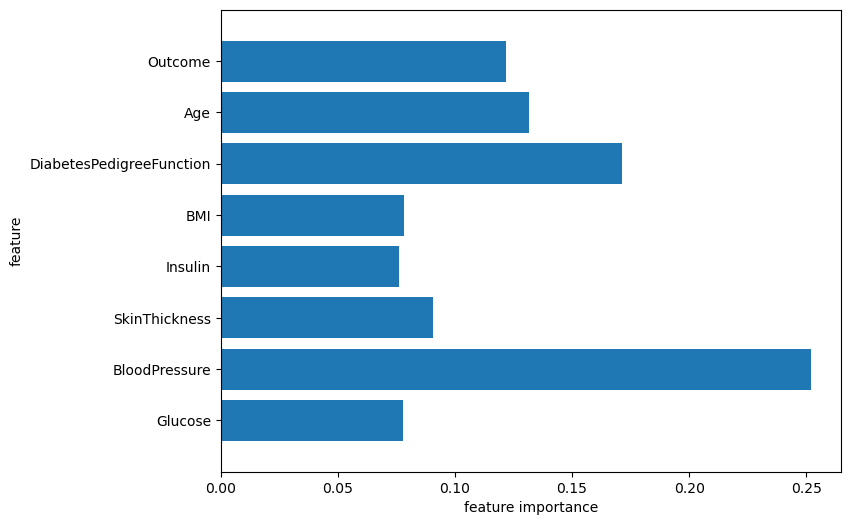

In [193]:
plot_feature_importances_diabetes(rf)

In [194]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=3,n_estimators=100,random_state=0)
rf.fit(X_train,y_train)
print(f"Accuracy on training set {rf.score(X_train,y_train)}")
print(f"Accuracy on testing set {rf.score(X_test,y_test)}")

Accuracy on training set 0.8003472222222222
Accuracy on testing set 0.7552083333333334


# Feature Importance

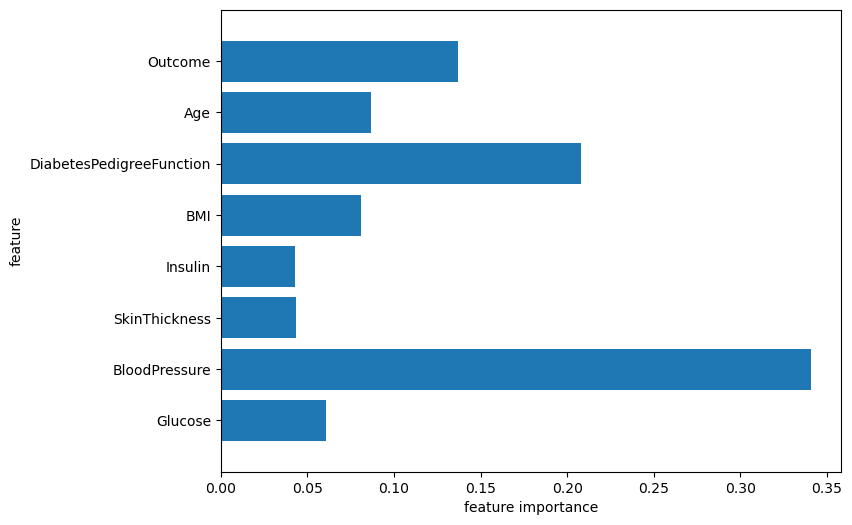

In [195]:
plot_feature_importances_diabetes(rf)

# Gradient Boosting

In [196]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(random_state=0)
gb.fit(X_train,y_train)
print(f"Accuracy on training set {gb.score(X_train,y_train)}")
print(f"Accuracy on testing set {gb.score(X_test,y_test)}")

Accuracy on training set 0.9166666666666666
Accuracy on testing set 0.7916666666666666


In [197]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(max_depth=1,random_state=0)
gb.fit(X_train,y_train)
print(f"Accuracy on training set {gb.score(X_train,y_train)}")
print(f"Accuracy on testing set {gb.score(X_test,y_test)}")

Accuracy on training set 0.8038194444444444
Accuracy on testing set 0.78125


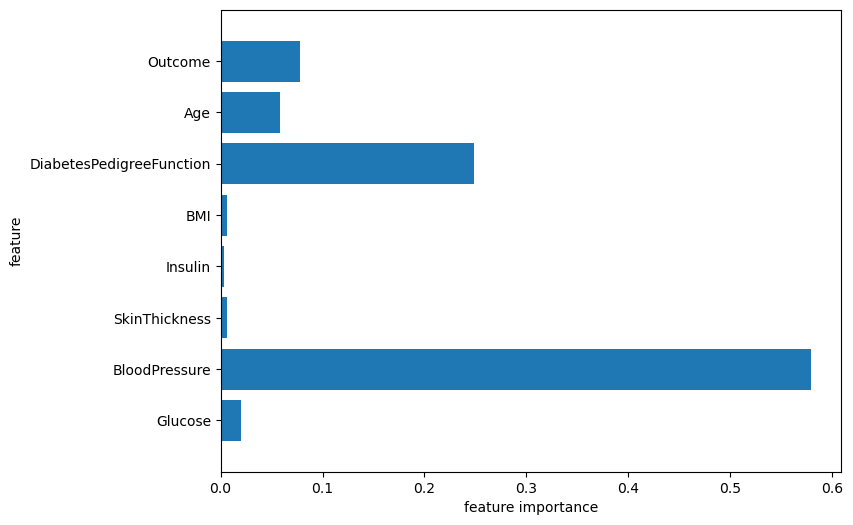

In [198]:
plot_feature_importances_diabetes(gb)

# Support Vector Machine (SVM)

In [199]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(X_train,y_train)
print(f"Accuracy on training set{svc.score(X_train,y_train)}")
print(f"Accuracy on testing set{svc.score(X_test,y_test)}")
# overfitting occurs

Accuracy on training set0.7690972222222222
Accuracy on testing set0.7552083333333334


In [202]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

svc=SVC(C=1000)
svc.fit(X_train,y_train)

print(f"Accuracy on training set{svc.score(X_train_scaled,y_train)}")
print(f"Accuracy on testing set{svc.score(X_test_scaled,y_test)}")

Accuracy on training set0.6510416666666666
Accuracy on testing set0.6510416666666666


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


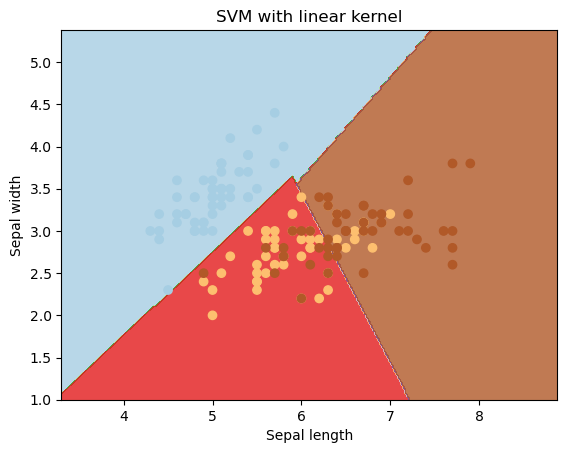

In [203]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# Load iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2] # Use only first two features for visualization
y = iris.target

# Create meshgrid of points to visualize decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Fit SVM with linear kernel
C = 1.0 # regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

# Predict class labels for each point in meshgrid
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM with linear kernel')
plt.show()


# Deep learning

https://www.youtube.com/watch?v=RIgXUd_InTM&list=PL_qddN8p6eHvJucYvMn13AFB4jdLWJwh-&index=3&ab_channel=BashayerAlharbi